In [3]:
include(joinpath(@__DIR__,"..","src","interactive_setup.jl"))
datadir = joinpath(@__DIR__,"..","data","buildup")
files = readdir(datadir)

┌ Info: Loading RCall ggplot2 backend for `PlotAxes`
└ @ PlotAxes /Users/davidlittle/.julia/packages/PlotAxes/V6M7t/src/PlotAxes.jl:252
┌ Warning: RCall.jl: Warning: package ‘ggplot2’ was built under R version 3.5.2
└ @ RCall /Users/davidlittle/.julia/packages/RCall/iojZI/src/io.jl:113
┌ Info: Loading Gadfly backend for `PlotAxes`
└ @ PlotAxes /Users/davidlittle/.julia/packages/PlotAxes/V6M7t/src/PlotAxes.jl:271


13-element Array{String,1}:
 "central_df12_2019-08-01.csv"   
 "central_df3_2019-08-01.csv"    
 "central_df6_2019-08-01.csv"    
 "combined_df12_2019-08-01.csv"  
 "combined_df3_2019-08-01.csv"   
 "combined_df6_2019-08-01.csv"   
 "object_df12_2019-08-01.csv"    
 "object_df3_2019-08-01.csv"     
 "object_df6_2019-08-01.csv"     
 "old"                           
 "peripheral_df12_2019-08-01.csv"
 "peripheral_df3_2019-08-01.csv" 
 "peripheral_df6_2019-08-01.csv" 

In [4]:
df = mapreduce(vcat,files) do file
  if !isfile(joinpath(datadir,file))
    return DataFrame()
  end
  df = DataFrame(CSV.File(joinpath(datadir,file)))
  m = match(r"^([a-z]+)_df([0-9]+)_([0-9-]+)\.csv",file)
  if isnothing(m)
    @warn("Filename $file doesn't match the expected naming convention.")
  else
    df[!,:level] .= titlecase(m[1])
    df[!,:df] .= parse(Int,m[2])
    df[!,:date] .= Date(m[3])
    df
  end
end

,length,response,run,level,df,date
,Float64,Int64,Int64,String,Int64,Date
1,0.72,1,1,Central,12,2019-08-01
2,0.96,2,1,Central,12,2019-08-01
3,1.68,1,1,Central,12,2019-08-01
4,0.96,2,1,Central,12,2019-08-01
5,0.72,1,1,Central,12,2019-08-01
6,3.36,2,1,Central,12,2019-08-01
7,0.48,1,1,Central,12,2019-08-01
8,1.68,2,1,Central,12,2019-08-01
9,0.72,1,2,Central,12,2019-08-01


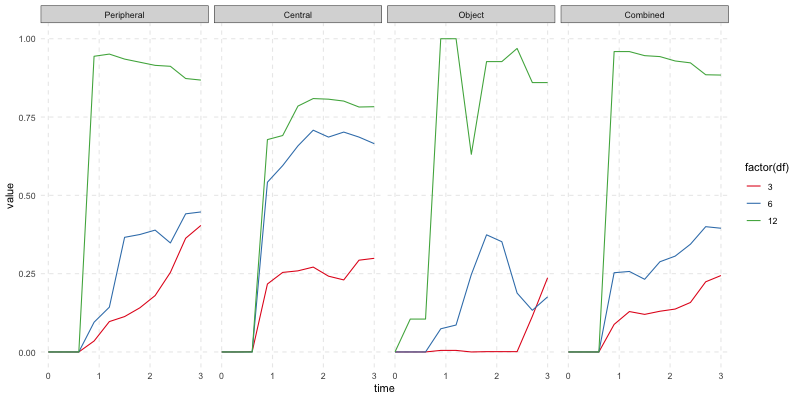

RObject{VecSxp}


┌ Warning: RCall.jl: Warning: Removed 90 rows containing missing values (geom_path).
└ @ RCall /Users/davidlittle/.julia/packages/RCall/iojZI/src/io.jl:113


In [49]:
means = by(df,[:level,:df]) do df
  buildup_mean(df,delta=0.3,length=12)
end

R"""
library(dplyr)
df = $means
df$level = factor(df$level, levels=c("Peripheral","Central","Object","Combined"), ordered=T)
df = df %>% arrange(level)
ggplot(df,aes(x=time,y=value,color=factor(df))) + geom_line() +
  scale_color_brewer(palette='Set1') + 
  facet_grid(~level) + xlim(0,3) + theme_bw() + 
  theme(panel.border = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_line(linetype=2),
        panel.grid.minor = element_blank())
"""

In [50]:
R"""
ggsave($(joinpath(plotdir,"fig_buildup.pdf")),height=2.5,width=7.5)
"""

┌ Warning: RCall.jl: Warning: Removed 90 rows containing missing values (geom_path).
└ @ RCall /Users/davidlittle/.julia/packages/RCall/iojZI/src/io.jl:113


RObject{NilSxp}
NULL
